In [1]:
%matplotlib ipympl

In [2]:
# Import dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from scipy.stats import sem

In [3]:
# Import the California housing data set and get description
# <fetch_xxx()> used to import the data set
california_dataset = fetch_california_housing()
# <.DESCR> used to get a description of the dataset
print(california_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
# Read California housing data into a Pandas dataframe
# <.feature_names> contains the names of the features (columns) in the dataset
# <pd.DataFrame(data=..., columns=...)> 
### creates a DataFrame where data is set to the feature matrix, and columns is set to the feature names.
### This assigns meaningful column names to the DataFrame
housing_data = pd.DataFrame(data=california_dataset.data,columns=california_dataset.feature_names)
# Adding new column ['MEDV'] 
# <.target> contains the values of the target variable, which are typically houseprices in this dataset 
housing_data['MEDV'] = california_dataset.target
# <.head()> Displays top 5
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# Create a bunch of samples, each with sample size of 20
nsamples = 25
div = 20
# <.sample(div)> a Pandas method that randomly selects and returns #div rows from the original DataFrame
# The list comprehension [housing_data.sample(div) for x in range(0,nsamples)] 
### creates a list by repeatedly sampling (div)) rows from the original DataFrame (nsample) times
samples = [housing_data.sample(div) for x in range(0,nsamples)]

In [6]:
samples

[        MedInc  HouseAge  AveRooms  AveBedrms  Population   AveOccup  \
 3132    2.8750      15.0  5.891892   1.124324       960.0   2.594595   
 2655    3.0147      52.0  6.740741   1.111111       806.0   2.985185   
 19435   0.5360      16.0  2.111111   2.111111       166.0  18.444444   
 6567    3.7932      37.0  5.501377   0.994490      1037.0   2.856749   
 7108    4.2292      33.0  6.393750   1.021875      1018.0   3.181250   
 16953   6.3892      17.0  6.438953   1.001938      2557.0   2.477713   
 13000   4.2273      18.0  5.069252   0.867036       905.0   2.506925   
 10338   4.2564      25.0  5.592105   1.085526      4528.0   4.255639   
 481     2.6071      52.0  4.074906   1.142322       486.0   1.820225   
 18625   5.5919      17.0  5.994228   1.066378      2149.0   3.101010   
 15441   2.7019      16.0  4.957096   1.082508      1948.0   3.214521   
 4789    2.0042      47.0  4.875740   1.023669      1120.0   3.313609   
 12154   3.8869      10.0  7.104854   1.262136     

In [7]:
# Calculate means
# <.mean()> to calculate mean on 'MEDV' column for each DF
# <s['MDEV']> accesses the ['MDEV'] column from each DataFrame
# <[s['MEDV'].mean() for s in samples]>
# iterates through each DataFrame in samples and calculates the mean of the 'MEDV' column for each sample.
means = [s['MEDV'].mean() for s in samples]
# Calculate standard error on means
# <s['MDEV']> accesses the ['MDEV'] column from each DataFrame
# <[sem(s['MEDV']) for s in samples]>
# iterates through each DataFrame in samples and calculates the Standard Error of the mean of the 'MEDV' column for each sample.
sems = [sem(s['MEDV']) for s in samples]

In [8]:
sems

[0.2677408492765021,
 0.27765910135165367,
 0.22891086377153785,
 0.13440536682580403,
 0.24870316562592296,
 0.27743139729582367,
 0.25567499854664893,
 0.2563198725436175,
 0.24164784082744412,
 0.25927778312831623,
 0.27760019736880115,
 0.21632039195065314,
 0.22404397437894452,
 0.2053849351314438,
 0.19632335705747234,
 0.2979459742580285,
 0.18708772041900276,
 0.22142570662105063,
 0.1343904812379523,
 0.3076236039647529,
 0.16879330048753027,
 0.3010022448600281,
 0.2677934144668777,
 0.20683020623334086,
 0.24365323164767436]

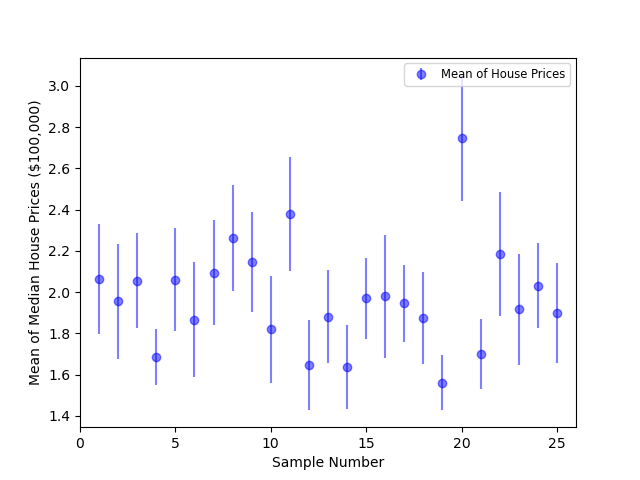

In [9]:
# Plot sample means with error bars
# <plt.subplots()> using this we can create the figure and axis
fig, ax = plt.subplots()
# <ax.errorbar( x, y, errorbar values, fmt="o")
# <fmt="o"> specifies the fomar of the data points. In this case "o" is a circle
# yerr=sems specifies the error bars for each data point. sems is assumed to be a list of standard errors corresponding to each mean value
# <alpha=0.5> refers to the transparency
ax.errorbar(np.arange(0, len(samples), 1)+1,means, yerr=sems, fmt="o", color="b",
            alpha=0.5, label="Mean of House Prices")
# <ax.set_xlim(minimum,maximum)> to set the x axis limits
ax.set_xlim(0, len(means)+1)
# <.set_xlabel()> to set the x-axis label to "Sample Number"
ax.set_xlabel("Sample Number")
# <.set_ylabel()> to set the y-axis label to "Mean MPG"
ax.set_ylabel("Mean of Median House Prices ($100,000)")
# <plt.legend()>
# <loc="best"> to show the legends location
# <fontsize=> refers to the font size
# <fancybox=True> adds a fancy box around the legend to make it stand out
plt.legend(loc="best", fontsize="small", fancybox=True)
# <plt.show()> to display data
plt.show()

In [10]:
# Calculate the range of SEM values
# max(sems) - min(sems) --- Standard Error of The Mean
print(f"The range of SEM values in the sample set is {max(sems)-min(sems)}")

The range of SEM values in the sample set is 0.1732331227268006


In [11]:
# Determine which sample's mean is closest to the population mean
# <f" "> to make an f string or a message of <min(sems)>
print(f"The smallest SEM observed was {min(sems)}")
# <.index()> on 'min(sems)' to change the index
samp_index = sems.index(min(sems))
print(f"The sample with the smallest SEM is sample {samp_index+1}")

The smallest SEM observed was 0.1343904812379523
The sample with the smallest SEM is sample 19


In [12]:
# Compare to the population mean
# <samp_index> is the index of the sample we want to use from 'samples'
# <.mean()> calculates the mean (average) of the values in the 'MEDV' column from the DataFrame

print(f"The mean of the sample 5 is {samples[samp_index]['MEDV'].mean()}")
# <housing_data['MEDV']> accesses the 'MEDV' column from the DataFrame
# <.mean()> calculates the mean (average)
print(f"The mean of the population data set is {housing_data['MEDV'].mean()}")

The mean of the sample 5 is 1.56065
The mean of the population data set is 2.068558169089147
